<a href="https://colab.research.google.com/github/Claudio-Ferriz/Proyecto-AP/blob/main/Proyecto_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
# Importación y ejecución de las librerías de Python para el análisis y modelado
# de datos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe

In [2]:
# Generar el primer dataframe referido a Aprobación Presidencial el cual
# se encuentra en formato excel importandolo desde el repositorio
# github del proyecto.

# Agregar el dataframe (df) crudo y documentar todo.

df = pd.read_excel('https://github.com/Claudio-Ferriz/Proyecto-AP/raw/refs/heads/main/Encuestas%20Aprobaci%C3%B3n%20Presidencial%20Marzo%202025%20-%20Limpiado.xlsx')

# Eliminar las columnas 'Unnamed' y 'Consultora' que no generan valor al df.

unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]

df = df.drop(columns=unnamed_cols)

df.drop(columns=['Consultora'], inplace=True)

df

,País,Región I,Región II,Tipo de Encuesta,Mes,Fecha,Aprueba,Presidente,Partido del presidente,Tipo de Presidente,Fecha asunción,Días de presidencia,Presidencial / Parlamentario,Unitario o Federal,Población,Indice Desarrollo Humano,PBI per capita (PPA),Tasa Desempleo,Inflación
0,Alemania,Europa,Europa,Online,Abril,2020-04-03,64.0,Angela Merkel,Unión Democrata Cristiana de Alemania,Insider,2005-11-22,5246.0,Parlamentario,Federal,83160343,0.944,57905,5.9,0.4
1,Alemania,Europa,Europa,Online,Mayo,2020-05-06,61.0,Angela Merkel,Unión Democrata Cristiana de Alemania,Insider,2005-11-22,5279.0,Parlamentario,Federal,83160343,0.944,57905,5.9,0.5
2,Alemania,Europa,Europa,Online,Mayo,2020-05-21,64.0,Angela Merkel,Unión Democrata Cristiana de Alemania,Insider,2005-11-22,5294.0,Parlamentario,Federal,83160343,0.944,57905,5.9,0.5
3,Alemania,Europa,Europa,Online,Mayo,2020-05-31,68.0,Angela Merkel,Unión Democrata Cristiana de Alemania,Insider,2005-11-22,5304.0,Parlamentario,Federal,83160343,0.944,57905,5.9,0.5
4,Alemania,Europa,Europa,Online,Junio,2020-06-16,40.0,Angela Merkel,Unión Democrata Cristiana de Alemania,Insider,2005-11-22,5320.0,Parlamentario,Federal,83160343,0.944,57905,5.9,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,Uruguay,América,América Latina,Recopilación,Octubre,NaT,51.0,Luis Lacalle Pou,Partido Nacional,Insider,2020-03-01,1690.0,Presidencial,Unitario,3444263,0.809,22887,8.5,5
2565,Uruguay,América,América Latina,Presencial/Telefónica,Noviembre,2024-10-08,54.0,Luis Lacalle Pou,Partido Nacional,Insider,2020-03-01,1713.0,Presidencial,Unitario,3444263,0.809,22887,8.5,5
2566,Uruguay,América,América Latina,Presencial/Telefónica,Diciembre,2024-10-08,58.0,Luis Lacalle Pou,Partido Nacional,Insider,2020-03-01,1743.0,Presidencial,Unitario,3444263,0.809,22887,8.5,5
2567,Uruguay,América,América Latina,Recopilación,Diciembre,NaT,51.0,Luis Lacalle Pou,Partido Nacional,Insider,2020-03-01,1743.0,Presidencial,Unitario,3444263,0.809,22887,8.5,5


# Exploratory Data Analysis (EDA)

## Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   País                          2569 non-null   object        
 1   Región I                      2569 non-null   object        
 2   Región II                     2569 non-null   object        
 3   Tipo de Encuesta              2499 non-null   object        
 4   Mes                           2569 non-null   object        
 5   Fecha                         2505 non-null   datetime64[ns]
 6   Aprueba                       2515 non-null   float64       
 7   Presidente                    2567 non-null   object        
 8   Partido del presidente        2567 non-null   object        
 9   Tipo de Presidente            2564 non-null   object        
 10  Fecha asunción                2561 non-null   datetime64[ns]
 11  Días de presidencia           

In [4]:
df.isnull().sum()

,0
País,0
Región I,0
Región II,0
Tipo de Encuesta,70
Mes,0
Fecha,64
Aprueba,54
Presidente,2
Partido del presidente,2
Tipo de Presidente,5


In [5]:
df.País.value_counts()

,count
País,
Argentina,339
Estados Unidos,256
Chile,255
México,247
Perú,157
Brasil,153
Francia,153
Inglaterra,150
Colombia,125


In [6]:
df.Mes.value_counts()

,count
Mes,
Febrero,255
Marzo,249
Abril,235
Junio,221
Agosto,213
Mayo,211
Julio,196
Diciembre,193
Septiembre,191


In [7]:
df.Aprueba.value_counts()

,count
Aprueba,
40.0,82
41.0,78
39.0,77
38.0,73
34.0,69
...,...
22.1,1
34.4,1
46.1,1


## Visualizaciones

In [ ]:
# Hacer visualizaciones de clusters usando tipo de presidente,
# presidencial / parlamentario, PBI, etc.

In [13]:
# Filtrado de Países dentro del df.

countries_to_plot = ['Argentina', 'Uruguay']

df_filtered = df[df['País'].isin(countries_to_plot)]

president_to_plot = ['Javier Milei', 'Luis Lacalle Pou']

df_filtered_1 = df[df['Presidente'].isin(president_to_plot)]

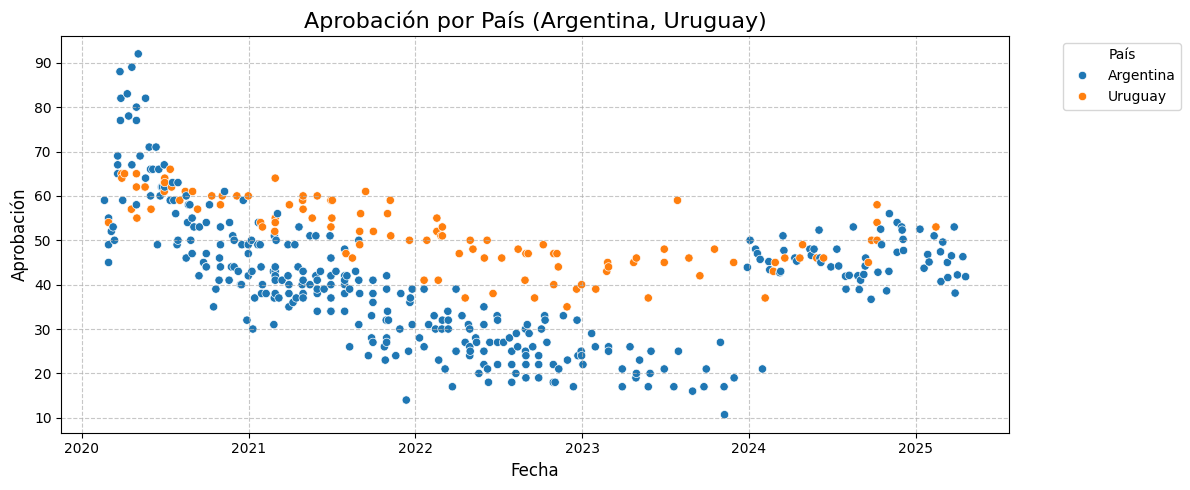

In [19]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df_filtered, x='Fecha', y='Aprueba', hue='País')

plt.title(f'Aprobación por País ({", ".join(countries_to_plot)})', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Aprobación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout() # Ajusta el layout para que todo quepa
plt.show()

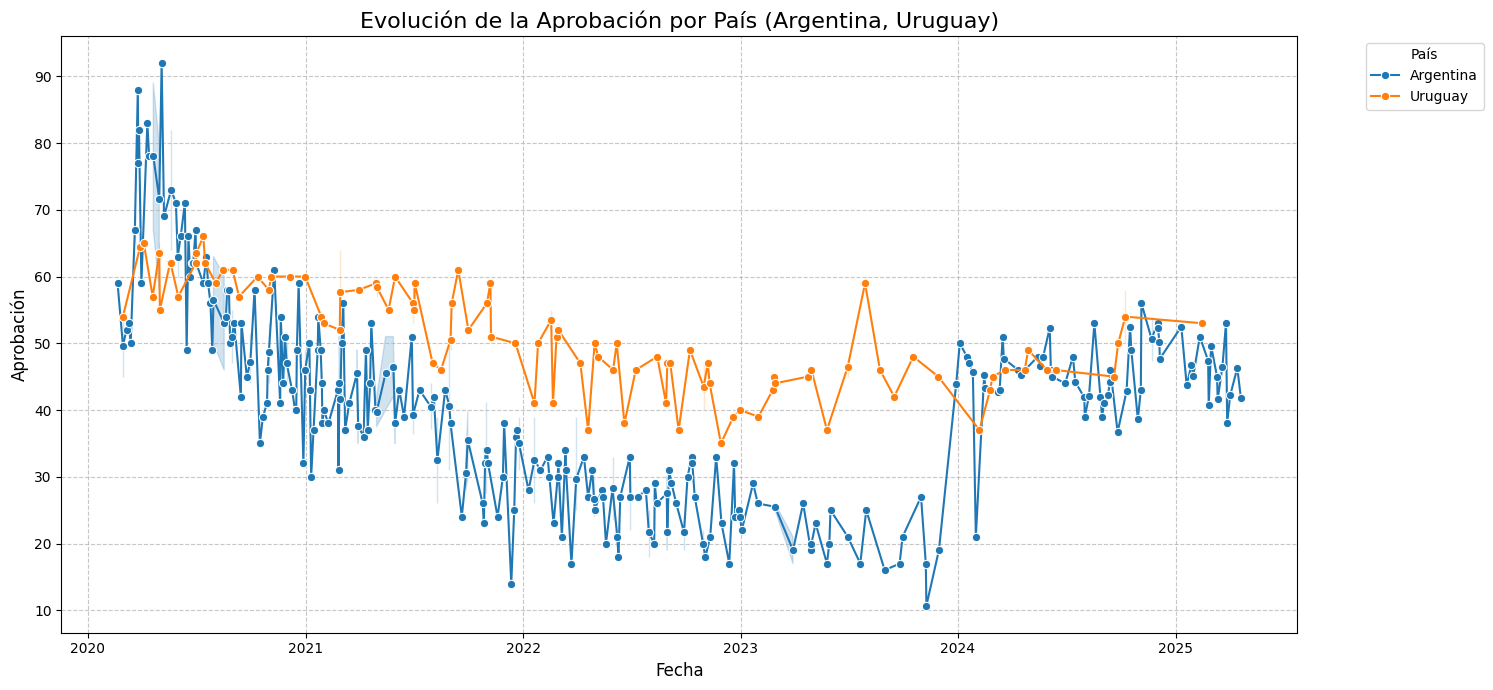

In [17]:
df_filtered = df_filtered.sort_values(by='Fecha')

plt.figure(figsize=[15, 7])
sns.lineplot(data=df_filtered, x='Fecha', y='Aprueba', hue='País', marker='o') # 'marker' para resaltar cada punto de dato

plt.title(f'Evolución de la Aprobación por País ({", ".join(countries_to_plot)})', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Aprobación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout() # Ajusta el layout para que todo quepa
plt.show()

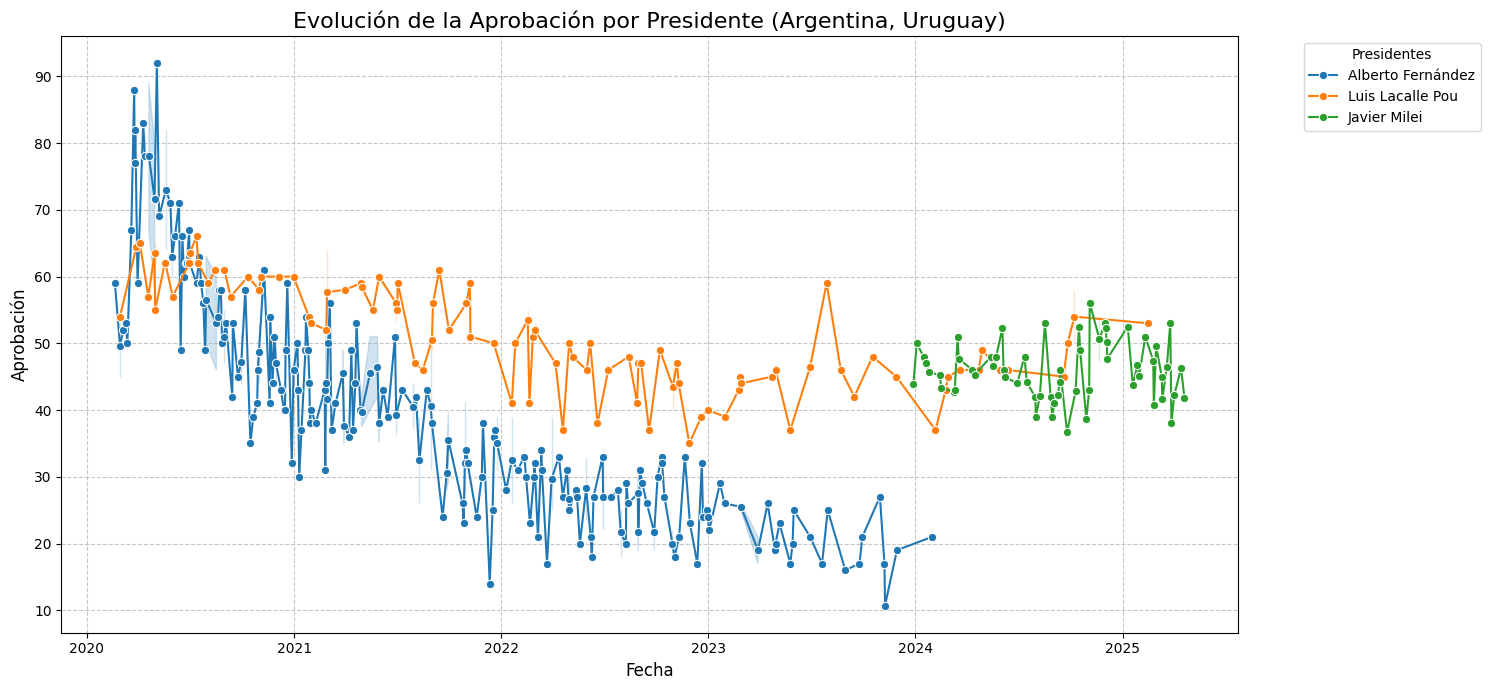

In [18]:
df_filtered_1 = df_filtered.sort_values(by='Fecha')

plt.figure(figsize=[15, 7])
sns.lineplot(data=df_filtered_1, x='Fecha', y='Aprueba', hue='Presidente', marker='o') # 'marker' para resaltar cada punto de dato

plt.title(f'Evolución de la Aprobación por Presidente ({", ".join(countries_to_plot)})', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Aprobación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Presidentes', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout() # Ajusta el layout para que todo quepa
plt.show()